In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
from olist.data import Olist
from olist.order import Order
from olist.seller import Seller

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [31]:
#geting tables
orders = Order().get_training_data(with_distance_seller_customer=True).copy()
data = Olist().get_data().copy()
matching_table = Olist().get_matching_table().copy()
seller=Seller().get_training_data().copy()

In [122]:
data['order_reviews']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [32]:
seller

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,share_of_one_stars,share_of_five_stars,share_of_four_stars,share_of_three_stars,share_of_two_stars,review_score,n_orders,quantity,quantity_per_order,sales
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,0.333333,0.333333,0.000,0.333333,0.000,3.00,3,3,1.000000,218.70
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,0.050000,0.725000,0.200,0.025000,0.000,4.55,40,41,1.025000,11703.07
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.000000,1.000000,0.000,0.000000,0.000,5.00,1,1,1.000000,158.00
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.000000,1.000000,0.000,0.000000,0.000,5.00,1,1,1.000000,79.99
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,1.000000,0.000000,0.000,0.000000,0.000,1.00,1,1,1.000000,167.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.000000,1.000000,0.000,0.000000,0.000,5.00,2,2,1.000000,158.00
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,0.100000,0.500000,0.300,0.100000,0.000,4.10,10,10,1.000000,889.00
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,0.000000,1.000000,0.000,0.000000,0.000,5.00,6,7,1.166667,550.04
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,0.000000,0.500000,0.375,0.000000,0.125,4.25,8,11,1.375000,297.00


# Explore

<AxesSubplot:xlabel='sales', ylabel='share_of_one_stars'>

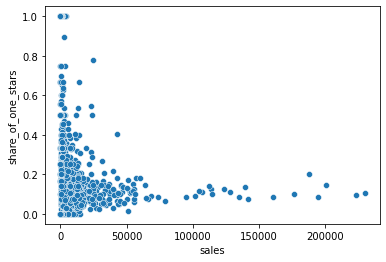

In [33]:
#investigate sales vs share of one star
sns.scatterplot(x=seller['sales'],y=seller['share_of_one_stars'])

# OLIST Revenue

In [34]:
#new column: DAYS SELLER IS ACTIVE
seller['months_of_sales']=((seller['date_last_sale']-seller['date_first_sale']).dt.days+1)*(12/365)
# to get in months(seller['date_last_sale']-seller['date_first_sale'])/np.timedelta64(1,'M')
#seller['OlistREV']=seller['sales']*0.1+seller[]

In [35]:
#new column: MONTHLY REVENUE
seller['monthly_sales']=(seller['sales']/(seller['months_of_sales']))*0.1+80
seller['month_round']=seller['months_of_sales'].apply(lambda x: int(x)+1)

In [36]:
#new column: MONTHLY COSTS
seller['monthly_costs']=((seller['share_of_one_stars']*seller['n_orders']*100)+seller['share_of_two_stars']*seller['n_orders']*50+seller['share_of_three_stars']*seller['n_orders']*40)/(seller['months_of_sales'])

### Add IT costs

In [37]:
#calculating IT costs contribution     0.5MM=k*sqrt(total_orders)  for each seller: ITCost=k*sqrt(n_order)
seller['monthly_costs_IT']=0
#total cost
totalcost=500000
#sum square orders of Olist
total_orders=(seller['n_orders']).sum()
#calculating k
k=totalcost/((total_orders)**0.5)

In [38]:
#calculating each seller cost
seller['monthly_costs_IT']=((seller['n_orders']/total_orders)*totalcost)/(seller['months_of_sales'])

In [39]:
seller['monthly_profit']=seller['monthly_sales']-seller['monthly_costs']-seller['monthly_costs_IT']

In [42]:
seller['monthly_costs_total']=seller['monthly_costs']+seller['monthly_costs_IT']

In [43]:
seller.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,share_of_one_stars,share_of_five_stars,share_of_four_stars,...,quantity,quantity_per_order,sales,months_of_sales,monthly_sales,month_round,monthly_costs,monthly_costs_IT,monthly_profit,monthly_costs_total
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,0.333333,0.333333,0.0,...,3,1.000,218.70,3.846575,85.685577,4,36.396011,3.905783,45.383783,40.301794
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,0.050000,0.725000,0.2,...,41,1.025,11703.07,14.301370,161.831811,15,16.781609,14.006945,131.043257,30.788555
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.000000,1.000000,0.0,...,1,1.000,158.00,0.032877,560.583333,1,0.000000,152.325531,408.257802,152.325531
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.000000,1.000000,0.0,...,1,1.000,79.99,0.032877,323.302917,1,0.000000,152.325531,170.977386,152.325531
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,1.000000,0.000000,0.0,...,1,1.000,167.99,0.032877,590.969583,1,3041.666667,152.325531,-2603.022614,3193.992198


In [44]:
seller['cumm_costs_total']=seller['monthly_costs_total']*seller['months_of_sales']

In [56]:
seller['cumm_profit']=seller['sales']-seller['cumm_costs_total']

In [57]:
seller

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,share_of_one_stars,share_of_five_stars,share_of_four_stars,...,months_of_sales,monthly_sales,month_round,monthly_costs,monthly_costs_IT,monthly_profit,monthly_costs_total,cumm_costs_total,cumm_costs_profit,cumm_profit
498,ee27a8f15b1dded4d213a468ba4eb391,goiania,GO,0.000000,11.955023,2017-05-26 02:45:17,2017-05-26 02:45:17,0.000000,1.0,0.000000,...,0.032877,19847.791667,1,0.000000,152.325531,19695.466136,152.325531,5.007963,6493.992037,6493.992037
615,585175ec331ea177fa47199e39a6170a,montes claros,MG,0.000000,7.919514,2017-02-22 10:03:56,2017-02-22 10:03:56,0.000000,1.0,0.000000,...,0.032877,10874.875000,1,0.000000,152.325531,10722.549469,152.325531,5.007963,3543.992037,3543.992037
824,e908c0f3646e8b60375734a350d95d71,sao paulo,SP,0.000000,27.108947,2017-04-06 16:30:21,2017-04-06 16:30:21,0.000000,0.0,1.000000,...,0.032877,9055.958333,1,0.000000,152.325531,8903.632802,152.325531,5.007963,2945.992037,2945.992037
1839,8de8fe3af4449ed695d2434c933ed73e,sao paulo,SP,0.000000,10.056852,2018-08-05 15:45:17,2018-08-05 15:45:17,0.000000,1.0,0.000000,...,0.032877,6437.083333,1,0.000000,152.325531,6284.757802,152.325531,5.007963,2084.992037,2084.992037
352,8ec76bb0965af3f007692b26fa9d6623,criciuma,SC,0.000000,11.309363,2017-11-18 13:30:43,2017-11-18 13:30:43,0.000000,1.0,0.000000,...,0.032877,6160.291667,1,0.000000,152.325531,6007.966136,152.325531,5.007963,1993.992037,1993.992037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,cc1f04647be106ba74e62b21f358af25,sao paulo,SP,0.000000,13.295810,2018-06-23 02:20:20,2018-06-23 02:20:20,1.000000,0.0,0.000000,...,0.032877,116.195833,1,3041.666667,152.325531,-3077.796364,3193.992198,105.007963,-93.107963,-93.107963
2745,455f46ef09a9e45667e2981df84b5cc2,sorocaba,SP,2.667164,13.019329,2018-08-07 19:25:15,2018-08-07 22:30:17,0.500000,0.0,0.500000,...,0.032877,261.891667,1,3041.666667,304.651062,-3084.426062,3346.317729,110.015925,-50.215925,-50.215925
1801,5151aea44289d6c6b090ee31c2132508,marilia,SP,0.000000,17.375995,2017-02-17 15:42:59,2017-02-21 04:50:55,0.666667,0.0,0.166667,...,0.131507,1080.176042,1,3903.472222,266.569679,-3089.865860,4170.041901,548.389072,766.910928,766.910928
2014,1fa2d3def6adfa70e58c276bb64fe5bb,sao paulo,SP,0.000000,6.255382,2018-08-24 13:24:27,2018-08-24 13:24:27,1.000000,0.0,0.000000,...,0.032877,100.987500,1,3041.666667,152.325531,-3093.004698,3193.992198,105.007963,-98.107963,-98.107963


In [64]:
seller=seller.sort_values(by=['monthly_profit'], ascending=False)

In [65]:
sorted_sellers=seller.reset_index()

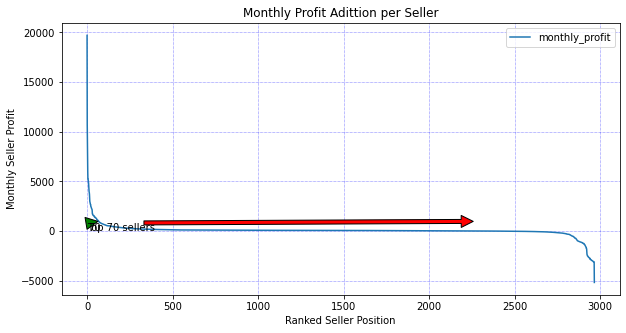

In [95]:
### Total Olist Profit
fig, ax1 = plt.subplots(figsize=(10,5))
profit_seller= sns.lineplot(data=sorted_sellers[['monthly_profit']])
profit_seller.set(xlabel='Ranked Seller Position', ylabel='Monthly Seller Profit')
profit_seller.set_title('Monthly Profit Adittion per Seller')
profit_seller.grid(linestyle=':', linewidth='0.5', color='blue')


#x1, y1 = [60, 60], [-5000, 1150]
#x2, y2 = [0, 550], [1317270.0, 1317270.0]
profit_seller.annotate('Top 70 sellers', xy =(70, 1000),
             xytext =(3, 1.8),
             arrowprops = dict(facecolor ='green',
                               shrink = 0.1),   )
profit_seller.annotate('70', xy =(2500, 1000),
             xytext =(5, 1.8),
             arrowprops = dict(facecolor ='red',
                               shrink = 0.1),   )
plt.show(profit_seller)

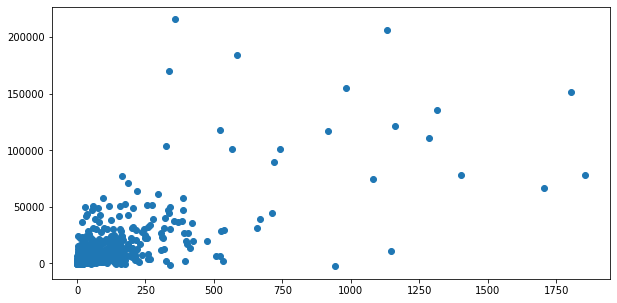

In [100]:
fig, ax3 = plt.subplots(figsize=(10,5))
ax3.scatter(sorted_sellers['n_orders'],sorted_sellers['cumm_profit'])

# Profit Drainers

In [93]:
negative_profit=sorted_sellers[sorted_sellers['cumm_profit']<0]

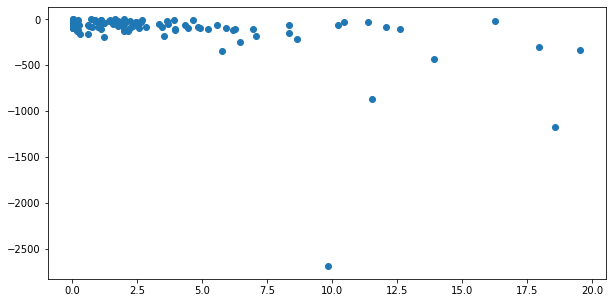

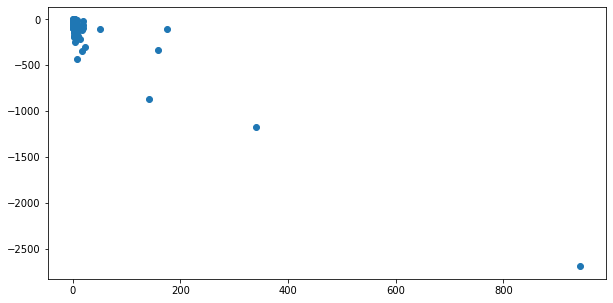

In [99]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.scatter(negative_profit['months_of_sales'],negative_profit['cumm_profit'])

fig, ax2 = plt.subplots(figsize=(10,5))
ax2.scatter(negative_profit['n_orders'],negative_profit['cumm_profit'])

In [145]:
negative_profit

,index,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,share_of_one_stars,share_of_five_stars,...,months_of_sales,monthly_sales,month_round,monthly_costs,monthly_costs_IT,monthly_profit,monthly_costs_total,cumm_costs_total,cumm_costs_profit,cumm_profit
1475,1022,9cea4682e16655f7da87f406902e989e,araucaria,PR,0.000000,8.910435,2017-03-22 23:39:13,2018-02-03 01:31:24,0.250000,0.750000,...,10.454795,80.839423,11,9.564990,1.916044,69.358390,11.481034,120.031851,-32.271851,-32.271851
1541,212,5cf1ec37aea089f45110c70653a166ab,sao paulo,SP,0.000000,21.465110,2017-04-04 05:45:13,2017-12-13 17:43:08,0.333333,0.666667,...,8.350685,80.598753,9,11.975066,1.799120,66.824567,13.774186,115.023888,-65.023888,-65.023888
1672,2716,20d53aad4fe5ee93a64f8839609d3586,santa rita do sapucai,MG,0.000000,39.277442,2017-11-26 10:35:56,2018-05-14 09:32:25,0.500000,0.000000,...,5.556164,80.934098,6,17.998028,1.802669,61.133401,19.800697,110.015925,-58.115925,-58.115925
1713,2643,1d139e3a3b14025640d8df1b230aace0,barrinha,SP,0.000000,7.653206,2017-09-13 12:35:16,2017-11-19 18:51:07,0.000000,0.000000,...,2.235616,81.632212,3,17.892157,4.480163,59.259892,22.372320,50.015925,-13.525925,-13.525925
1730,2360,6d988d6174a2c27441597174f8905515,maringa,PR,2.255867,19.259524,2017-04-02 15:55:19,2018-08-09 17:25:18,0.105263,0.578947,...,16.273973,82.284199,17,17.819865,5.846839,58.617496,23.666704,385.151291,-13.421291,-13.421291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,2135,6614814a00d344b846ae209f95ee7e3f,macatuba,SP,0.000000,4.787813,2017-06-08 23:25:17,2017-06-08 23:25:17,1.000000,0.000000,...,0.032877,119.541667,1,3041.666667,152.325531,-3074.450531,3193.992198,105.007963,-92.007963,-92.007963
2961,153,c1dde11f12d05c478f5de2d7319ad3b2,sao paulo,SP,0.000000,3.234734,2018-08-20 12:51:03,2018-08-20 12:51:03,1.000000,0.000000,...,0.032877,118.020833,1,3041.666667,152.325531,-3075.971364,3193.992198,105.007963,-92.507963,-92.507963
2962,260,cc1f04647be106ba74e62b21f358af25,sao paulo,SP,0.000000,13.295810,2018-06-23 02:20:20,2018-06-23 02:20:20,1.000000,0.000000,...,0.032877,116.195833,1,3041.666667,152.325531,-3077.796364,3193.992198,105.007963,-93.107963,-93.107963
2963,2745,455f46ef09a9e45667e2981df84b5cc2,sorocaba,SP,2.667164,13.019329,2018-08-07 19:25:15,2018-08-07 22:30:17,0.500000,0.000000,...,0.032877,261.891667,1,3041.666667,304.651062,-3084.426062,3346.317729,110.015925,-50.215925,-50.215925


<AxesSubplot:xlabel='wait_time', ylabel='Count'>

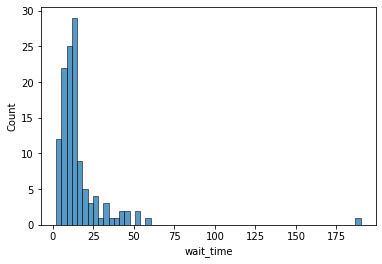

In [108]:
sns.histplot(data=negative_profit, x="wait_time")

In [112]:
sellerid_list=negative_profit['seller_id'].tolist()

### Add seller id to order reviews

In [156]:
order_review=data['order_reviews']

In [157]:
order_review=order_review.merge(matching_table[['order_id','seller_id']], how='left', on='order_id')

In [158]:
boolean_series = order_review.seller_id.isin(sellerid_list)

In [159]:
review_neg_sellers=order_review[boolean_series]

In [160]:
review_neg_sellers=review_neg_sellers[review_neg_sellers['review_score']<3]

In [162]:
review_neg_sellers

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_id
56,e233e51d11511bf30e568c76360ace52,548df2c6e5f089574614894bca78acf5,1,NaN,recebi somente 1 controle Midea Split ESTILO.\...,2018-01-28 00:00:00,2018-02-04 11:06:15,8b321bb669392f5163d04c59e235e066
234,3ff8285931cc9b54c9ad22ba78957f63,e6b23db78d4473c921fb9315e04b5c0f,1,NaN,Comprei dois produtos e recebi somente um. Man...,2017-05-14 00:00:00,2017-05-19 10:38:27,c1d1ebb4745cc43cb6f05e9c8a705c9a
493,7e6becdbaed9bd20e60602d1f8c2b4f9,acf6e912a8db79e50ddd2fe14628e89c,1,NaN,NaN,2018-08-15 00:00:00,2018-08-15 21:08:00,08ad4ac1388e4420ca531c3edfc46198
525,8fa0fe324426c676a8989ec7815a036c,7758cf0b4302587a9628d90b58d56dd8,1,NaN,NaN,2017-03-23 00:00:00,2017-03-23 18:31:14,b76dba6c951ab00dc4edf0a1aa88037e
725,2165b2b26e67eee7a9d28e13c0ad0468,d2aefa1e404936eb9c5660ac2bde4ecb,1,NaN,Não recebi o produto.e agora?,2018-05-30 00:00:00,2018-05-30 03:19:24,8b321bb669392f5163d04c59e235e066
...,...,...,...,...,...,...,...,...
103627,63fe749565f3523c3315875954399273,d71fc3033bc27e81b5a946294eb577dc,2,NaN,Comprei o espeto flex e o estinho flex.\r\no E...,2017-08-26 00:00:00,2017-08-29 10:54:54,2ec6e37d992a95eaddb3369dcbcc76d9
103647,96b865b772077a824d10f17724456947,79617f3124fcf7a760316d99421bd30f,1,NaN,NaN,2018-02-10 00:00:00,2018-02-11 11:36:11,6f1a1263039c76e68f40a8e536b1da6a
103862,054489c42e7a42ac12e216c7e5d63877,93c6619a4bcc406da04323380c97d896,1,NaN,ja estou esperando a um mês e não recebi o pro...,2018-03-07 00:00:00,2018-03-07 11:20:55,8b321bb669392f5163d04c59e235e066
104013,4605c29e0e3bf16ddc99db82aac244f6,f83b35bc0a9c439bc1a4a6597f425432,1,NaN,NaN,2018-01-17 00:00:00,2018-01-18 00:15:24,92eb0f42c21942b6552362b9b114707d


# NEW JOINER SELLERS. LESS THAN 3 MONTHS

In [78]:
new_joiners=sorted_sellers[sorted_sellers['months_of_sales']<3]

In [79]:
new_joiners=new_joiners.sort_values(by=['monthly_profit'], ascending=False)

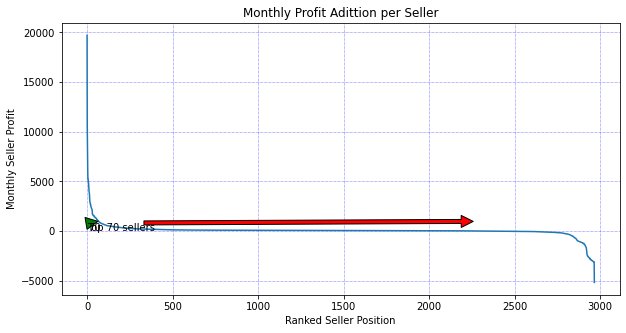

In [82]:
### Total Olist Profit
fig, ax1 = plt.subplots(figsize=(10,5))
new_sellers= sns.lineplot(data=new_joiners['monthly_profit'])
new_sellers.set(xlabel='Ranked Seller Position', ylabel='Monthly Seller Profit')
new_sellers.set_title('Monthly Profit Adittion per Seller')
new_sellers.grid(linestyle=':', linewidth='0.5', color='blue')


new_sellers.annotate('Top 70 sellers', xy =(70, 1000),
             xytext =(3, 1.8),
             arrowprops = dict(facecolor ='green',
                               shrink = 0.1),   )
new_sellers.annotate('70', xy =(2500, 1000),
             xytext =(5, 1.8),
             arrowprops = dict(facecolor ='red',
                               shrink = 0.1),   )
plt.show(new_sellers)

In [81]:
new_joiners.shape

(1258, 28)

# Tier 3

In [165]:
tier_3=sorted_sellers[sorted_sellers['monthly_profit']<0]

In [168]:
monthly_loss=tier_3['monthly_profit'].sum()

### average monthly loss of -253 048 RS

In [180]:
senior_sellers_tier_3=tier_3[tier_3['months_of_sales']>3]

In [181]:
new_sellers_tier_3=tier_3[tier_3['months_of_sales']<=3]

In [189]:
new_sellers_tier_3

,index,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,share_of_one_stars,share_of_five_stars,...,months_of_sales,monthly_sales,month_round,monthly_costs,monthly_costs_IT,monthly_profit,monthly_costs_total,cumm_costs_total,cumm_costs_profit,cumm_profit
2432,1959,3c3017960b2dbd72711a61f0400aab8f,jaragua do sul,SC,0.000000,12.523007,2017-01-24 03:42:07,2017-04-05 18:02:43,0.200000,0.700000,...,2.367123,120.927315,3,101.388889,21.156324,-1.617898,122.545213,290.079627,678.720373,678.720373
2433,2097,d5c530f4884a75ae0dba9c148718d278,centro,MG,0.000000,8.279427,2017-09-15 14:05:05,2017-11-28 15:18:52,0.333333,0.500000,...,2.465753,91.391244,3,81.111111,12.186042,-1.905909,93.297154,230.047776,50.832224,50.832224
2434,906,f52c2422904463fdd7741f99045fecb6,santo andre/sao paulo,SP,0.000000,5.532023,2018-06-15 22:20:34,2018-08-22 03:35:20,0.083333,0.666667,...,2.235616,105.397469,3,80.514706,26.880976,-1.998213,107.395682,240.095552,327.694448,327.694448
2435,546,e644cbadf7eeb30d0d29f335ce7d52ec,sao paulo,SP,0.000000,6.943683,2018-07-05 16:30:49,2018-08-23 02:44:21,0.125000,0.250000,...,1.610959,134.557568,2,111.734694,24.869474,-2.046600,136.604168,220.063701,658.836299,658.836299
2436,798,1acde099eb406aa220b1169b188b42da,sao paulo,SP,0.000000,12.417634,2017-09-12 04:50:37,2017-11-08 03:50:25,0.111111,0.666667,...,1.873973,96.601096,2,74.707602,24.051400,-2.157905,98.759002,185.071664,126.028336,126.028336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,260,cc1f04647be106ba74e62b21f358af25,sao paulo,SP,0.000000,13.295810,2018-06-23 02:20:20,2018-06-23 02:20:20,1.000000,0.000000,...,0.032877,116.195833,1,3041.666667,152.325531,-3077.796364,3193.992198,105.007963,-93.107963,-93.107963
2963,2745,455f46ef09a9e45667e2981df84b5cc2,sorocaba,SP,2.667164,13.019329,2018-08-07 19:25:15,2018-08-07 22:30:17,0.500000,0.000000,...,0.032877,261.891667,1,3041.666667,304.651062,-3084.426062,3346.317729,110.015925,-50.215925,-50.215925
2964,1801,5151aea44289d6c6b090ee31c2132508,marilia,SP,0.000000,17.375995,2017-02-17 15:42:59,2017-02-21 04:50:55,0.666667,0.000000,...,0.131507,1080.176042,1,3903.472222,266.569679,-3089.865860,4170.041901,548.389072,766.910928,766.910928
2965,2014,1fa2d3def6adfa70e58c276bb64fe5bb,sao paulo,SP,0.000000,6.255382,2018-08-24 13:24:27,2018-08-24 13:24:27,1.000000,0.000000,...,0.032877,100.987500,1,3041.666667,152.325531,-3093.004698,3193.992198,105.007963,-98.107963,-98.107963


# Tier 2

# Tier 1